# Matplotlib

Examples of how to create useful plots with just matplotlib and numpy.

## Documentation

https://matplotlib.org/stable/api/figure_api.html  
https://matplotlib.org/stable/api/axes_api.html

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

## Configuration

In [2]:
plt.style.use("ggplot")

## Datasets

In [3]:
df = pd.read_csv("iris.data", names=("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))

## Plots

### Histogram

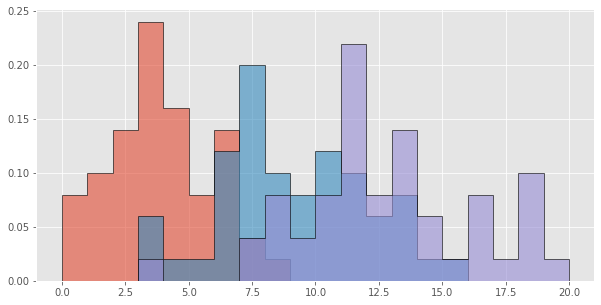

In [4]:
def hist(attr, nbins, w, h):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(w, h)

    attr_min = df[attr].min()
    attr_max = df[attr].max()
    bins = np.linspace(attr_min, attr_max, nbins+1)
    bin_width = (attr_max-attr_min)/(nbins+1)
    
    freq_max = 0.0
    
    for i, (species, species_df) in enumerate(df.groupby("class")):
        hist, bin_edges = np.histogram(species_df[attr], bins)
        normed_hist = hist / np.sum(hist)
        freq_max = max(np.amax(normed_hist), freq_max)
        ax.stairs(normed_hist, fill=True, linewidth=1, edgecolor="black", alpha=0.6)

hist(attr="sepal_length", nbins=20, w=10, h=5)

### ECDF

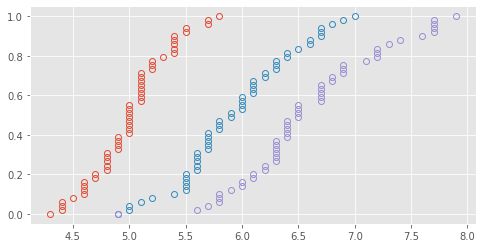

In [41]:
def ecdf_plot(attr, w, h):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(w, h)
    
    for i, (species, species_df) in enumerate(df.groupby("class")):
        vals = np.sort(species_df[attr])
        quantiles = np.linspace(0, 1, len(species_df[attr]))
        ax.plot(vals, quantiles, "o", fillstyle="none")

ecdf_plot("sepal_length", 8, 4)

### Strip plot

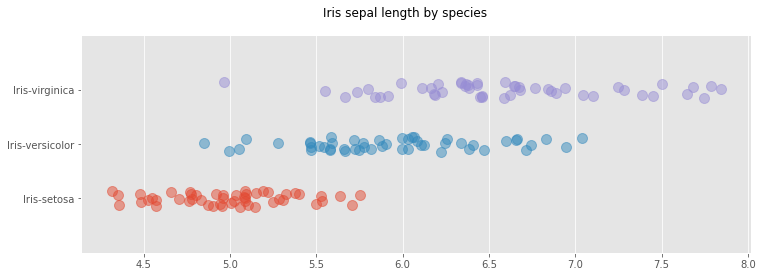

In [45]:
def stripplot(ax, categories_and_observations, x_jitter=0.1, y_jitter=0.15):
    cat_width = 1.0
    y_ticks = []
    y_labels = []
    cat_count = 0

    for i, (category, observations) in enumerate(categories_and_observations):
        x_vec = observations
        x_jitter_vec = np.random.uniform(-x_jitter, x_jitter, len(observations))

        y = ((cat_width/2.0) # top margin
             + (i * cat_width) # previous categories
             + (cat_width/2.0)) # center of the cat area
        y_vec = y * np.ones(len(observations))
        y_jitter_vec = np.random.uniform(-y_jitter, y_jitter, len(observations))

        ax.plot(x_vec + x_jitter_vec, y_vec + y_jitter_vec, 'o', alpha=0.5, markersize=10, linewidth=2)

        y_ticks.append(y)
        y_labels.append(category)
        cat_count += 1

    ax.set_ylim(0, (cat_count + 1) * cat_width)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.grid(True, which="both", axis="x")
    ax.grid(False, which="both", axis="y")

fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
fig.suptitle("Iris sepal length by species")
sepal_length_by_species = ((group, values["sepal_length"]) for (group, values) in df.groupby("class"))
stripplot(ax, sepal_length_by_species)